# Import Libraries<---RUN

In [1]:
####### INIT ######################################################################################

from context import rmlib
from time import sleep

import numpy as np
import rmlib

from rmlib.rmtools.asm_BT_lib.asm_tree_Basic import augment_RM
import rmlib.rmtools as rm
from config import robotConfig

robot = rmlib.robot.Robot(robotConfig)
augment_RM(robot)

#loads variables attached to this notebook
%store -r  


####### LIBS ######################################################################################

# Import Pytrees
import py_trees
#from py_trees.tests import Timeout_Success
from py_trees.composites import Sequence , Selector

from rmlib.rmtools.asm_BT_lib.asm_tree_Basic import *
from rmlib.rmtools.asm_BT_lib.asm_tree_FT_based import *

import math
from pmath import translate_pose, get_disance_between_poses, pose_components

from utils import is_matx_list
from math import radians

print( "\n##!## READY ##!##" )

Loaded: /home/nvidia/dev_rmstudio/rmlib/rmlib/rmtools Exists?: True
Loaded: /home/nvidia/dev_rmstudio/rmlib Exists?: True
Setting up robot please wait...
my_components: {'ft_config': {'remote_port': 10000, 'filter': {'beta': 0.035, 'alpha': 0.012}, 'module_name': 'sensors.ftsensor_optoforce', 'local_ip': '127.0.0.1', 'remote_ip': '', 'class_name': 'OptoForce', 'local_port': 20000, 'max_workers': 10, 'ip_address': '192.168.0.100', 'dataHz': 50.0}, 'arm_config': {'max_joint_speed': 1.05, 'class_name': 'UR5', 'max_linear_speed': 0.25, 'default_linear_speed': 0.1, 'ip_address': '192.168.0.101', 'module_name': 'arms.ur5', 'xmlrpc_port': '8003', 'max_joint_accel': 1.4, 'default_joint_speed': 0.7, 'max_linear_accel': 1.2, 'default_joint_accel': 0.8, 'default_linear_accel': 0.8}, 'hand_config': {'module_name': 'hands.smarthand', 'finger_width_inner': 0.0, 'class_name': 'SmartHand', 'finger_depth': 0.014, 'finger_length': 0.0415, 'finger_width_outer': 0.015}}
active_componetns: {'ft': ['ft_conf

# Arm Movements<---RUN

In [7]:
#from task_parameters import taskParams , _TB_side , _M8_TB_height , _M6_TB_height , _M4_TB_height

_DRILL_CONTACT_PRESS = 11.0

#SafePose = robot.arm.get_tcp_pose() #rm.get_tcp_pose()
#%store SafePose

#BlockInsertPose = robot.arm.get_tcp_pose() #rm.get_tcp_pose()
#%store BlockInsertPose

%store -r 

"""
### Move to Safe Pose ###
Basic movements are defined in:
rmlib/rmlib/rmtools/assembly_trees/asm_tree_Basic.py

All of the basic behaviors and trees inherit `py_trees` classes.

"""
moveNode = Move_Arm( pose  = SafePose , # 4x4 homogeneous coord pose
                     mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                     speed = 0.125 , 
                     accel = 0.35 , 
                     ctrl  = robot ) # Ref togitkraken `rmlib` object, stored in `robot` in this NB
run_BT_until_done(moveNode,HidePrintout=1)#Nverb=0,
 
print('done!')

done!


## Safe Pose move

In [10]:
robot.hand.deactivate_motors()

1

In [18]:
robot.hand.deactivate_motors()
moveNode = Move_Arm( pose  = SafePose , # 4x4 homogeneous coord pose
                     mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                     speed = 0.125 , 
                     accel = 0.35 , 
                     ctrl  = robot ) # Ref togitkraken `rmlib` object, stored in `robot` in this NB
run_BT_until_done(moveNode,HidePrintout=1)#Nverb=0,
print("done")

done


In [ ]:
"""
print(shaftPreInsertPose_high)
print(shaftPreInsertPose_low)
print("low pos shifts")
PerturbRadius=0
print(perturb_pose_radially_XY( shaftPreInsertPose_low, PerturbRadius ))
print(perturb_pose_radially_XY( shaftPreInsertPose_low, PerturbRadius ))
print(perturb_pose_radially_XY( shaftPreInsertPose_low, PerturbRadius ))
"""

## Set up BTs<---RUN

In [10]:
#Get Shaft and move it above hole, ready for training episode
#Return shaft to holder
from random import random

def make_above_pose( trgtPose, vertOffset = 0.070 ):
    """ Return a pose that is vertically offset  """
    rtrnPose = trgtPose.copy()
    rtrnPose[2,3] += vertOffset
    return rtrnPose


def perturb_pose_radially_XY( pose, radMax , inches=True ):
    if inches==True:
        radMax=radMax*0.0254
    """ Return a version of `pose` that is moved in the XY plane up to `radMax` distance """
    rtrnPose = pose.copy()
    dX = dY = 5000.0
    while np.linalg.norm( [dX, dY] ) > radMax:
        dX = -radMax + 2*radMax*random()
        dY = -radMax + 2*radMax*random()
    rtrnPose[0,3] += dX
    rtrnPose[1,3] += dY
    print(  )
    return rtrnPose


SafePose_moveNode = Move_Arm( pose  = SafePose , # 4x4 homogeneous coord pose
                         mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                         speed = 0.125 , accel = 0.35 , 
                         ctrl  = robot ) # Ref togitkraken `rmlib` object, stored in `robot` in this NB
    
shaftAboveGraspPose_moveNode = Move_Arm( pose  = shaftAboveGraspPose, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                     mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                     speed = 0.125 , accel = 0.35 , 
                     ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB



#shaftGraspPoseV2_low   - low grab point on cylinder
#shaftGraspPoseV2   - higher grab point on cylinder, lowest squares on gippers


shaftGraspPoseV2_moveNode = Move_Arm( pose  = shaftGraspPoseV2_low, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                     mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                     speed = 0.125 , 
                     accel = 0.35 , 
                     ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB

graspBehav = Grasp_at_Pose( shaftGraspPoseV2_low, partWidth=0.015 ,
                            zApproach=0.050 , zClose=0.0 , wdthNarrow = 0.030 , 
                            maxIter=5, zFree=0.100 , 
                            ctrl = robot )

shaftPreInsertPose_moveNode_high = Move_Arm( pose  = shaftPreInsertPose_high, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                             mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                             speed = 0.125 , accel = 0.35 ,  
                             ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB

shaftPreInsertPose_moveNode_low= Move_Arm( pose  = shaftPreInsertPose_low, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                             mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                             speed = 0.125 , accel = 0.35 ,  
                             ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB


#get shaft from holder, bring it to position above hole target 


def ShaftFetch(PerturbRadius=0,inchestoggle=True):
    #0.15 inches perturb looks good
    
    fetchTree = Sequence( memory = 1) #memory = 1 


    if PerturbRadius == 0:
        shaftPreInsertPose_moveNode_low_SHIFTED = Move_Arm( pose  = shaftPreInsertPose_low, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                             mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                             speed = 0.125 , accel = 0.35 ,  
                             ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB

    else:
    #radMax=0.0254/2  # 1 inch in meters
        shaftPreInsertPose_low_SHIFTED=perturb_pose_radially_XY( shaftPreInsertPose_low, PerturbRadius,inchestoggle )
        shaftPreInsertPose_moveNode_low_SHIFTED = Move_Arm( pose  = shaftPreInsertPose_low_SHIFTED, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                             mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                             speed = 0.125 , accel = 0.35 ,  
                             ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB

    fetchTree.add_children( [SafePose_moveNode,
                             shaftAboveGraspPose_moveNode,
                             graspBehav,shaftAboveGraspPose_moveNode,
                             shaftPreInsertPose_moveNode_high,#SafePose_moveNode,
                             shaftPreInsertPose_moveNode_low_SHIFTED] ) 
    run_BT_until_done(fetchTree,HidePrintout=1)#Nverb=0,
    
    
def ShaftReturn():

    returnTree = Sequence( memory = 1 ) #memory = 1 

    returnTree.add_children( [shaftPreInsertPose_moveNode_high,#,SafePose_moveNode,
                             shaftAboveGraspPose_moveNode,shaftGraspPoseV2_moveNode] ) 
    run_BT_until_done(returnTree,HidePrintout=1)#Nverb=0,

    # 3. Release
    robot.hand.release()
    
    returnTree2 = Sequence( memory = 1 ) #memory = 1 
    
    returnTree2.add_children( [shaftAboveGraspPose_moveNode,SafePose_moveNode] )
    
    run_BT_until_done(returnTree2,HidePrintout=1)#Nverb=0,
# I may need to add these again!!!
# 4. Deactivate motors
#robot.hand.deactivate_motors()

#dropBehav = Set_Fingers( openState = 1.0 , ctrl = robot )


#-------------------------------------------------------------------------------
def ShaftReset(PerturbRadius=0,inchestoggle=True):
    #0.15 inches perturb looks good
    resetTree1 = Sequence( ) #memory = 1 


    resetTree1.add_children( [shaftPreInsertPose_moveNode_high,#SafePose_moveNode,
                            shaftAboveGraspPose_moveNode,shaftGraspPoseV2_moveNode] ) 
    run_BT_until_done(resetTree1,HidePrintout=1)#Nverb=0,
    
    robot.hand.release()
    
    resetTree2 = Sequence(memory = 1  ) #memory = 1 
    

    if PerturbRadius == 0:
        shaftPreInsertPose_moveNode_low_SHIFTED = Move_Arm( pose  = shaftPreInsertPose_low, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                             mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                             speed = 0.125 , accel = 0.35 ,  
                             ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB

    else:
    #radMax=0.0254/2  # 1 inch in meters
        shaftPreInsertPose_low_SHIFTED=perturb_pose_radially_XY( shaftPreInsertPose_low, PerturbRadius, inchestoggle)
        shaftPreInsertPose_moveNode_low_SHIFTED = Move_Arm( pose  = shaftPreInsertPose_low_SHIFTED, # BlockInsertPose  SafePose  4x4 homogeneous coord pose
                             mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                             speed = 0.125 , accel = 0.35 ,  
                             ctrl  = robot ) # Ref to `rmlib` object, stored in `robot` in this NB

    resetTree2.add_children( [graspBehav,shaftAboveGraspPose_moveNode,shaftPreInsertPose_moveNode_high,#SafePose_moveNode,
                             shaftPreInsertPose_moveNode_low_SHIFTED] ) 
    run_BT_until_done(resetTree2,HidePrintout=1)#Nverb=0,
    
#move shaft from current position to pose above the hole target, drop shaft in holder


#### Test BT's

In [5]:
moveNode = Move_Arm( pose  = SafePose , # 4x4 homogeneous coord pose
                     mode  = 'l' ,  # { 'l': linear in task space, 'j': linear in joint space }
                     speed = 0.125 , 
                     accel = 0.35 , 
                     ctrl  = robot ) # Ref togitkraken `rmlib` object, stored in `robot` in this NB
run_BT_until_done(moveNode,HidePrintout=1)#Nverb=0,
print("done")

done


In [11]:
#"""
print("Fetching")
ShaftFetch()
#ShaftFetch()
#"""

Fetching


In [8]:


resetTree3 = Sequence(memory = 1  )
resetTree3.add_children([shaftPreInsertPose_moveNode_high])
run_BT_until_done(resetTree3,HidePrintout=1)
""""""

''

In [6]:
#pre+_insert low
"""
TransRotatmatrix=robot.arm.get_tcp_pose() 
print(TransRotatmatrix)
"""

'\nTransRotatmatrix=robot.arm.get_tcp_pose() \nprint(TransRotatmatrix)\n'

In [7]:

print("Resetting")
ShaftReset(PerturbRadius=0,inchestoggle=True)  #0.15
print("reset complete")
#robot.hand.deactivate_motors()
""""""

Resetting
reset complete


''

In [8]:
"""
# half inserted pose 
TransRotatmatrix=robot.arm.get_tcp_pose() 
print(TransRotatmatrix)
"""

'\n# half inserted pose \nTransRotatmatrix=robot.arm.get_tcp_pose() \nprint(TransRotatmatrix)\n'

In [8]:

print("Returning")

ShaftReturn()
print("done")
robot.hand.deactivate_motors()
""""""

Returning
done


''

In [10]:
#run_BT_until_done(shaftPreInsertPose_moveNode_high,HidePrintout=1)#Nverb=0,
#run_BT_until_done(shaftAboveGraspPose_moveNode,HidePrintout=1)#Nverb=0,
#run_BT_until_done(shaftGraspPoseV2_moveNode,HidePrintout=1)#Nverb=0,
#shaftAboveGraspPose

#### peg grab testing

In [11]:
"""

#from scipy.spatial.transform import Rotation as R
def rot2rpy(Rt, degrees=False):
    #Converts a rotation matrix into rpy / intrinsic xyz euler angle form.
    #Args:    Rt (ndarray): The rotation matrix.
    #Returns: ndarray: Angles in rpy / intrinsic xyz euler angle form.
    
    return R.from_matrix(Rt).as_euler('xyz', degrees=degrees)


def rpy2rot(rpy, degrees=False):
    #Converts rpy / intrinsic xyz euler angles into a rotation matrix.
    #Args:    rpy (array-like): rpy / intrinsic xyz euler angles.
    #         degrees (bool) : Whether or not euler_angles are in degrees (True), or radians (False).
    #Returns: ndarray: The rotation matrix.
    
    return R.from_euler('xyz', rpy, degrees=degrees).as_matrix()

TransRotatmatrix=robot.arm.get_tcp_pose() 
print(type(TransRotatmatrix))
x_pose=TransRotatmatrix[0][3]*39.3701  #convert to inches 
y_pose=TransRotatmatrix[1][3]*39.3701
z_pose=TransRotatmatrix[2][3]*39.3701
rpy=rot2rpy(TransRotatmatrix[0:3,0:3],True)
roll=rpy[0]  #In degrees!
pitch=rpy[1]
yaw=rpy[2]
print(x_pose,y_pose,z_pose)
print(roll,pitch,yaw)
"""
"""
def exceeds_Z_force2(zLimitF):
        #Condition: Return a function that returns 1 if the z reaction limit is reached 
        def func():
            _DEBUG = 0
            #Stops when Z reaction exceeds value
            wrench = robot.ft.get_wrist_force()
            mag_x   = wrench[0]
            mag_y   = wrench[1]
            mag_z   = wrench[2]
            if _DEBUG: 
                print( "exceeds_Z_force , wrench:" , wrench )
                print("wrench[2]=",wrench[2], "    -zLimitF=",-zLimitF)
            if wrench[2] < -zLimitF:
                builtins._GLOB_FT_FLAG = 1
                #print("pass")
                return 1
            else:
                #print("fail")
                return 0
        return func
"""

'\ndef exceeds_Z_force2(zLimitF):\n        #Condition: Return a function that returns 1 if the z reaction limit is reached \n        def func():\n            _DEBUG = 0\n            #Stops when Z reaction exceeds value\n            wrench = robot.ft.get_wrist_force()\n            mag_x   = wrench[0]\n            mag_y   = wrench[1]\n            mag_z   = wrench[2]\n            if _DEBUG: \n                print( "exceeds_Z_force , wrench:" , wrench )\n                print("wrench[2]=",wrench[2], "    -zLimitF=",-zLimitF)\n            if wrench[2] < -zLimitF:\n                builtins._GLOB_FT_FLAG = 1\n                #print("pass")\n                return 1\n            else:\n                #print("fail")\n                return 0\n        return func\n'

## Plot Forces+Torques

[  0.3      -0.5     -20.2       0.026    -0.03599  -0.03599]
0
4
8
12
16


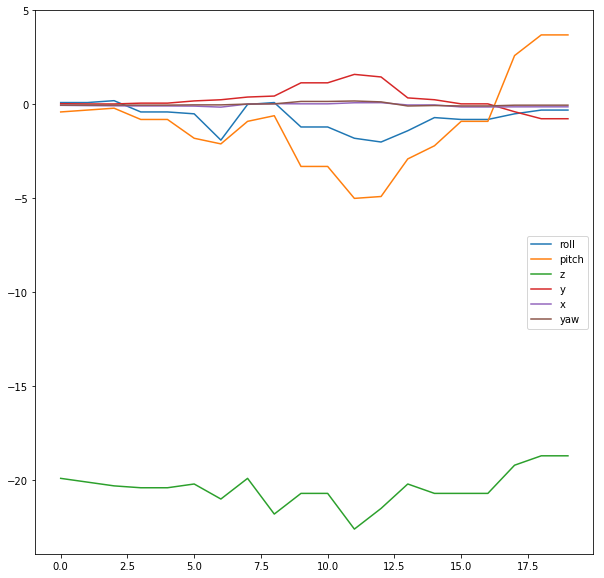

''

In [35]:

import matplotlib.pyplot as plt
import numpy as np
import time

wrench  = robot.ft.get_wrist_force()
print(wrench)
xforcelist=[]
yforcelist=[]
zforcelist=[]
rolltorquelist=[]
pitchtorquelist=[]
yawtorquelist=[]
for i in range(20):
    if i%4==0:
        print(i)
    wrench  = robot.ft.get_wrist_force()
    xforcelist.append(wrench[0])
    yforcelist.append(wrench[1])
    zforcelist.append(wrench[2])
    rolltorquelist.append(wrench[3])
    pitchtorquelist.append(wrench[4])
    yawtorquelist.append(wrench[5])  # wrench[5] is wrist rotation
    
    time.sleep(.1)
    
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(20),xforcelist,range(20),yforcelist,range(20),zforcelist,
       range(20),rolltorquelist,range(20),pitchtorquelist,range(20),yawtorquelist)    
ax.legend({'x','y','z','roll','pitch','yaw'})
plt.show()
""""""

#by default, everything is around zero other than z force, at ~ -20

## Main Loop<---RUN TO HERE

In [17]:

import socket
import numpy as np
import struct

bot='red'  #'blue'
print(bot, "robot is being used. Please change the bot variable if this is incorrect")
PORT_SnS= 65495
PORT_DC = PORT_SnS-10

#for 20 steps
relMoveDistance=0.0254/40  # 1/40 inch in meters
Z_MoveDistance=0.0254/20  # 1/20 inch in meters


#0.00125=0.1/80
rotation_angle=5 # in degrees
rotation_angle=rotation_angle*(math.pi/180)  #convert to radians
#maxForce=2.0 #TapFz uses positive values #Newtons
inputstring=0
forcelimit=8#4.0
#condition = EXCEEDS_Z_force
#print(dir(condition))
verbose=0

def exceeds_force(force):
        #Condition: Return a function that returns 1 if the z reaction limit is reached 
        def func():
            _DEBUG = 0
            #Stops when Z reaction exceeds value
            wrench = robot.ft.get_wrist_force()
            mag_x   = wrench[0]
            mag_y   = wrench[1]
            mag_z   = wrench[2]

            if (abs(wrench[0]) > force or 
                abs(wrench[1]) > force or 
                abs(wrench[2]) > force) :
                builtins._GLOB_FT_FLAG = 1
                #print("pass")
                return 1
            else:
                #print("fail")
                if _DEBUG: 
                    print( "exceeds force limit of ", force ,"N  , wrench:" , wrench )
                return 0
        return func     
    
#for 10 steps:
#relMoveDistance=0.0254/20  # 1 inch in meters
#Z_MoveDistance=0.0254/10  # 1 inch in meters


#Start and Stop socket
sock_SnS = socket.socket(socket.AF_INET, socket.SOCK_STREAM)# Create a TCP/IP socket
HOST_SnS = '192.168.0.103'

server_address_SnS = (HOST_SnS, PORT_SnS)# Bind the socket to the port
print('Starting up SnS socket on {} port {}'.format(*server_address_SnS))
sock_SnS.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
sock_SnS.bind(server_address_SnS)

sock_SnS.listen(1) # Listen for incoming connections

print('waiting for SnS connection')
connection_SnS, client_address_SnS = sock_SnS.accept()

print('SnS connection from', client_address_SnS)
startmsg='start'
data1=startmsg.encode('ascii')    
connection_SnS.sendall(data1)
print('SnS start command sent to client')




#Data and command socket
sock_DC = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
HOST_DC  = '192.168.0.103'

# Bind the socket to the port
server_address_DC  = (HOST_DC , PORT_DC )
print('Starting up DC socket on {} port {}'.format(*server_address_DC))
sock_DC.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
sock_DC.bind(server_address_DC)
sock_DC.listen(1)# Listen for incoming connections

episodecounter=0

if bot=='red':
    robot.ft.bias_wrist_force()   

try:
    while True:
        # Wait for a connection
        print('waiting for DC connection')
        connection_DC, client_address_DC = sock_DC.accept()

        print('DC connection from', client_address_DC)

        # Receive the data in small chunks and retransmit it
        while True:
            command = connection_DC.recv(16)
            #print("command",command)
            pushTree = Sequence() 
            translation_New     = [0.0,0.0,0.0] 
            rotation_New    = [0.0,0.0,0.0] 
            
            #print('received {!r}'.format(command))
            if command==b'end':
                connection_DC.close()
                print("Closing+shutting down DC connection")
                break
                
            if command==b'obs':
                #print(" 1")
                if bot=='red':
                    if verbose==1:
                        print('sending pose data to DC client')
                    data=robot.arm.get_tcp_pose() 
                    #print(" 2")
                    #print(data)
                            #dat=bytes(data[i][j])#.encode('ascii')  arr.tolist()
                    posedatabyte=struct.pack('ffffffffffffffff', #16 floats
                                data[0][0],data[0][1],data[0][2],data[0][3],
                                data[1][0],data[1][1],data[1][2],data[1][3],
                                data[2][0],data[2][1],data[2][2],data[2][3],
                                data[3][0],data[3][1],data[3][2],data[3][3])
                    #print(" 3")
                    connection_DC.sendall(posedatabyte)   #was send  
                    #print(" 4")
                if bot=='blue':
                    if verbose==1:
                        print('sending pose data to DC client')
                    data=robot.arm.get_tcp_pose() 
                    wristft=robot.arm.get_tcp_force()
                    #print(" 2")
                    #print(data)
                            #dat=bytes(data[i][j])#.encode('ascii')  arr.tolist()
                    posedatabyte=struct.pack('ffffffffffffffffffffff', #22 floats
                                data[0][0],data[0][1],data[0][2],data[0][3],
                                data[1][0],data[1][1],data[1][2],data[1][3],
                                data[2][0],data[2][1],data[2][2],data[2][3],
                                data[3][0],data[3][1],data[3][2],data[3][3],
                                wristft[0], wristft[1],wristft[2],
                                wristft[3],wristft[4],wristft[5])          
                    #print(" 3")
                    connection_DC.sendall(posedatabyte)   #was send  
                    #print(" 4")
 
            if (command==b'action'):
                #print("Running BT")
                xy_command = connection_DC.recv(64)
                xy=struct.unpack('ff',xy_command) ##dd is more accurate..but I was getting errors with it
                if verbose==1:
                    print("continuous action output (-1 to 1)  X:",xy[0]," Y:",xy[1]) 
                    print("move  X:",relMoveDistance*xy[0]*39.3701," Y:",relMoveDistance*xy[1]*39.3701) 
                    
                translation_New   = [relMoveDistance*xy[0], relMoveDistance*xy[1],-1*Z_MoveDistance]
                #translation_New   = [0, 0,-1*Z_MoveDistance]
                
                rotation_New   =[0.0, 0.0 , 0.0] 
                
                pushTree.add_child(  
                        Move_Arm_Relative( 
                            translation = translation_New , # Trans. Vec
                            rotation    = rotation_New , # Euler angles
                            mode = 'l' , speed = 0.125 , accel = 0.35 , 
                            #stop_cond =exceeds_Z_force2( forcelimit ), #None, None, #
                            stop_cond =exceeds_force(forcelimit), #N                        
                            frame = 'origin' ,
                            cond_success = 0, # Flag true if we are using "stop_cond()==1" to mean *success*, otherwise the reverse
                            bias_wrist = 0 ,# was 0 # If `stop_cond` is force based, this is a good idea
                            _DEBUG =0, ctrl = robot
                        ) # NOTE: If no stop_cond is provided, the this behavior returns true only if the full motion has completed
                    )
                run_BT_until_done(pushTree,HidePrintout=1,BeetleEnable=0)  #Nverb=0 hopefully stops print outputs

            elif command==b'fetch':
                print("fetching shaft")
                ShaftFetch(PerturbRadius=0)
                
                inputstring='done'
                msg=inputstring.encode('ascii')
                connection_DC.send(msg)    
                episodecounter+=1
                  
            elif command==b'return':
                print("returning shaft")
                ShaftReturn()
                
                inputstring='done'
                msg=inputstring.encode('ascii')
                connection_DC.send(msg)  
                
            elif command==b'reset':
                print("resetting shaft")
                ShaftReset(PerturbRadius=0,inchestoggle=True)  #in inches!  was 0.1
                inputstring='done'
                msg=inputstring.encode('ascii')
                connection_DC.send(msg)    
                
                episodecounter+=1
                if episodecounter%3==0:
                    print("Biasing wrist force. Episode:",episodecounter)
                    robot.ft.bias_wrist_force()   
                    
            elif command==b'fetchobs':
                print("fetching shaft")
                #this is a hack. Not sure why this combined command occasionally comes in 
                ShaftFetch()
                
                inputstring='done'
                msg=inputstring.encode('ascii')
                connection_DC.send(msg)  

                if verbose==1:
                    print('sending pose data to DC client')
                data=robot.arm.get_tcp_pose() 
                #print(" 2")
                #print(data)
                        #dat=bytes(data[i][j])#.encode('ascii')  arr.tolist()
                posedatabyte=struct.pack('ffffffffffffffff',
                            data[0][0],data[0][1],data[0][2],data[0][3],
                            data[1][0],data[1][1],data[1][2],data[1][3],
                            data[2][0],data[2][1],data[2][2],data[2][3],
                            data[3][0],data[3][1],data[3][2],data[3][3])
                #print(" 3")
                connection_DC.sendall(posedatabyte)   #was send  
                
            if (command!=b'h' and command!=b'j' and command!=b'k' and command!=b'l' and
                command!=b'u' and command!=b'o'and command!=b'y' and command!=b'i' and
                command!=b'z' and command!=b'x' and command!=b'd' and command!=b'c' and
                command!=b'end' and command!=b'obs' and command != b'fetch' 
                and command != b'return' and command != b'reset' and command!=b'action' and command!=b''):
                print("unexpected command:", command)
                
            #else:
                #print('no data from', client_address_DC)
                #break
        if command==b'end':
            break
    stopcommand = connection_SnS.recv(16)
    print('received {!r}'.format(stopcommand))
    if stopcommand==b'end':
        print("Closing+shutting down SnS connection")
        connection_SnS.close()                   
finally:
   
        print("Closing+shutting down SnS connection")
        connection_SnS.close()    
        print("Closing+shutting down DC connection")
        connection_DC.close()    

red robot is being used. Please change the bot variable if this is incorrect
Starting up SnS socket on 192.168.0.103 port 65495
waiting for SnS connection
SnS connection from ('192.168.0.102', 38138)
SnS start command sent to client
Starting up DC socket on 192.168.0.103 port 65485
waiting for DC connection
DC connection from ('192.168.0.102', 40382)
fetching shaft
resetting shaft
[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relative [x]

[-] Sequence [x]
    --> Move_Arm_Relati

KeyboardInterrupt: 

In [4]:
import socket, array
print("Closing+shutting down SnS and DC connections")
connection_SnS.close()
#connection_SnS.shutdown(SHUT_RDWR)
connection_DC.close() 

Closing+shutting down SnS and DC connections


In [ ]:
above target pose:
    array([[-0.99934351, -0.00739002,  0.03546743, -0.19067701],
       [-0.00697206,  0.99990496,  0.01189363, -0.49435258],
       [-0.03555196,  0.01163854, -0.99930006,  0.09755498],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# Utils & Setup

In [3]:
robot.hand.deactivate_motors()

1

In [24]:
robot.arm.get_tcp_pose()

array([[-0.99934351, -0.00739002,  0.03546743, -0.19067701],
       [-0.00697206,  0.99990496,  0.01189363, -0.49435258],
       [-0.03555196,  0.01163854, -0.99930006,  0.09755498],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [23]:
robot.hand.set_finger_torque(0.3)

True

In [24]:
robot.hand.set_finger_width(0.0)

True

In [ ]:
robot.arm.move_speed( midDrillPose , 'l' , 0.125 , 0.35 , 0 , 'dummy' , False )

In [ ]:
"""
shaftGraspPoseV2_low

shaftAboveGraspPose


shaftPreInsertPose_high

shaftPreInsertPose_low

"""

In [12]:
shaftPreInsertPose_low = robot.arm.get_tcp_pose() #rm.get_tcp_pose()
%store shaftPreInsertPose_low

Stored 'shaftPreInsertPose_low' (ndarray)


In [ ]:
robot.arm.move_speed( aboveTableDrill , 'l' , 0.125 , 0.35 , 0 , 'dummy' , False )

# Run this after teaching any poses

In [ ]:
import pickle , traceback

def save_names_to_PKL( pklPath , nameStringList ):
    pklStruct = {}
    print( vars() )
    for name in nameStringList:
        pklStruct[ name ] = globals()[ name ]
        
    with open( pklPath , "wb" ) as f:
        try:
            print( "Pickling" , pklPath , end = '... ' )
            pickle.dump( pklStruct , f )
            print( "Success!" )
        except Exception as er:
            print( "FAILURE! :" , er )
            traceback.print_exc()
    print( "### Completed Writing" , pklPath , "###" )
    
save_names_to_PKL( 
    pklPath = "taughtPoses.pkl" , 
    nameStringList = [  
        'startPose' ,
        'M8_GraspPose' , 'M6_GraspPose' , 'M4_GraspPose' , 'GearShaft1_Setdown' , 'GearShaft2_Setdown' , 
        'BNC_Ma_Setdown' , 'KeySm_Setdown' , 'KeyLg_Setdown' , 'ShaftSm_Setdown' , 'ShaftLg_Setdown' , 
        'KeyLg_Grasp' , 'ShaftLg_Grasp' , 'BNC_Fe_Grasp' , 'ShaftSm_Grasp' , 
        'GearLg_Grasp' , 'GearLg_Grasp' , 'Ether_setdown' , 
        'M8_1_mag' , 'M8_2_mag' , 'M8_3_mag' , 'M8_4_mag' , 'M8_5_mag' , 'M8_6_mag' ,
        'M6_1_mag' , 'M6_2_mag' , 'M6_3_mag' , 'M6_4_mag' , 'M6_5_mag' , 'M6_6_mag' ,
        'M4_1_mag' , 'M4_2_mag' , 'M4_3_mag' , 'M4_4_mag' , 'M4_5_mag' , 'M4_6_mag' ,
        'releasePose' , 'SAFE_POSE' , 'midDrillPose' , 
        '_LRG_GEAR_DEX' , '_SML_GEAR_DEX', 'aboveTableDrill'
    ]
)